In [0]:
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import time
import tensorflow as tf

In [0]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
raw_data = load_files('/content/drive/My Drive/Colab Notebooks/Data_minor', shuffle=False)
#raw_data = load_files('/content/drive/My Drive/Colab Notebooks/Data', shuffle=False)
train = raw_data['filenames']
target = raw_data['target']

In [0]:
print('Total number of videos:', len(train))
print('\nNumber of videos in training data:', train.shape[0])

Total number of videos: 598

Number of videos in training data: 598


In [0]:
print('The categorical labels are converted into integers.\n')
for label in zip(range(6), raw_data['target_names']):
    print(label)


The categorical labels are converted into integers.

(0, 'boxing')
(1, 'handclapping')
(2, 'handwaving')
(3, 'jogging')
(4, 'running')
(5, 'walking')


In [0]:
for pair in zip(train[:5], target[:5]):
    print(pair)

('/content/drive/My Drive/Colab Notebooks/Data_minor/boxing/person01_boxing_d1_uncomp.avi', 0)
('/content/drive/My Drive/Colab Notebooks/Data_minor/boxing/person01_boxing_d2_uncomp.avi', 0)
('/content/drive/My Drive/Colab Notebooks/Data_minor/boxing/person01_boxing_d3_uncomp.avi', 0)
('/content/drive/My Drive/Colab Notebooks/Data_minor/boxing/person02_boxing_d1_uncomp.avi', 0)
('/content/drive/My Drive/Colab Notebooks/Data_minor/boxing/person02_boxing_d2_uncomp.avi', 0)


In [0]:
class Videoto3D:

    def __init__(self,n_channels, width, height, depth,n_videos):
        self.width = width
        self.height = height
        self.depth = depth
        self.n_channels=n_channels
        self.n_videos=n_videos
    
    def video3d(self, filename, color=False, skip=True):
        #filename of the corresponding video
        
        cap = cv2.VideoCapture(filename)
        
        
        nframe = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        
        if skip:
            frames = [x * nframe / self.depth for x in range(1,(self.depth+1))]
        else:
            frames = [x for x in range(self.depth)]
        
        
        frames=frames[(int(len(frames)/2)-5):(int(len(frames)/2)+5)]
        
        framearray = []

        for i in range(len(frames)):
            cap.set(cv2.CAP_PROP_POS_FRAMES, frames[i])
            ret, frame = cap.read()
            frame = cv2.resize(frame, (self.height, self.width))
            #img = cv2.imread('messi5.jpg',0)
            #frame = cv2.Canny(frame,224,224)
            #if color:
            #framearray.append(frame)
              
            #else:
            
            frame=cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
            framearray.append(cv2.cvtColor(frame,cv2.COLOR_GRAY2RGB))
               
        cap.release()
        
        
        
        return np.array(framearray)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The path of a sample video in the training data
sample_files = train[:1]

vid3d = Videoto3D(3,224, 224, 30,598)


Shape of the sample data: (10, 224, 224, 3)
(10, 224, 224, 3)


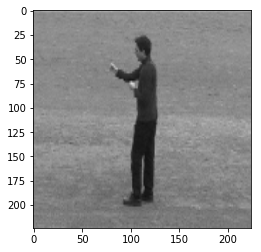

In [0]:
# Loading the sample videos, in their original format
sample = vid3d.video3d(sample_files[0])
print('\nShape of the sample data:', sample.shape)
# Displaying a frame from the sample video
#plt.imshow(sample)
plt.imshow(sample[2])
print(sample.shape)

In [0]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
vid3d = Videoto3D(3,224, 224, 30,518)
#vid3d = Videoto3D(3,128, 128, 60,300)
X_train=[]
#Y_train=[]
for i in range(0, len(train)):
    X_train.append(vid3d.video3d(train[i]))
    #Y_train.append(target[i])

label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(target)
X_train=np.array(X_train)
Y_train=np.array(Y_train)
print(Y_train)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [0]:
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', Y_train.shape)

Shape of training data: (598, 10, 224, 224, 3)
Shape of training labels: (598,)


In [0]:

print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])
print(X_train.shape[3])
channels=3
print(channels)
X_train=X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],X_train.shape[3],channels))

598
10
224
224
3


In [0]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling2D, GlobalAveragePooling3D,AveragePooling2D
from keras import losses
from keras.layers.core import Dense
from keras.layers import (Activation, Conv2D, Dense, Dropout, Flatten,
                          MaxPooling3D)
from keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D,Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys

In [0]:
def model_2D_LSTM():
  model = Sequential()
  model.add(TimeDistributed(Conv2D(32, (7, 7), strides=(2, 2),activation='relu', padding='same'), input_shape=X_train.shape[1:]))
  model.add(TimeDistributed(Conv2D(32, (3,3),kernel_initializer="he_normal", activation='relu')))
  #model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))
  model.add(TimeDistributed(AveragePooling2D((2, 2), strides=(2, 2))))
  #model.add(TimeDistributed(Conv2D(64, (3,3),padding='same', activation='relu')))
  model.add(TimeDistributed(Conv2D(64, (3,3),padding='same')))
  model.add(LeakyReLU())
  model.add(Dropout(0.5))
  #model.add(TimeDistributed(Conv2D(64, (3,3),padding='same', activation='relu')))
  model.add(TimeDistributed(AveragePooling2D((2, 2), strides=(2, 2))))
  #model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))
  #model.add(TimeDistributed(Conv2D(128, (3,3),padding='same', activation='relu')))
  #model.add(TimeDistributed(Conv2D(128, (3,3),padding='same', activation='relu')))
  model.add(TimeDistributed(Conv2D(128, (3,3),padding='same')))
  model.add(LeakyReLU())
  model.add(Dropout(0.3))
  model.add(BatchNormalization())
  #model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))
  model.add(TimeDistributed(AveragePooling2D((2, 2), strides=(2, 2))))
  #model.add(TimeDistributed(Conv2D(256, (3,3),padding='same', activation='relu')))
  #model.add(TimeDistributed(Conv2D(256, (3,3),padding='same', activation='relu')))
  '''model.add(TimeDistributed(Conv2D(256, (3,3),padding='same')))
  model.add(LeakyReLU())
  model.add(Dropout(0.5))
  model.add(TimeDistributed(AveragePooling2D((2, 2), strides=(2, 2))))'''
  #model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))   
  #model.add(TimeDistributed(Conv2D(512, (3,3),padding='same', activation='relu')))
  #model.add(TimeDistributed(Conv2D(512, (3,3),padding='same', activation='relu')))
  model.add(TimeDistributed(Conv2D(64, (3,3),padding='same')))
  model.add(LeakyReLU())
  model.add(Dropout(0.5))
  model.add(TimeDistributed(AveragePooling2D((2, 2), strides=(2, 2))))
  model.add(BatchNormalization())
  #model.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))
  model.add(TimeDistributed(Flatten()))
  #model.add(Dropout(0.3))
  
  #model.add(Bidirectional(LSTM(512, return_sequences=True, dropout=0.3)))
  model.add(Bidirectional(LSTM(256, return_sequences=False, dropout=0.5)))
  #model.add(Bidirectional(LSTM(256, return_sequences=False)))
  #model.add(Dropout(0.5))
  #model.add(Dense(256, activation='softmax'))
  model.add(Dense(6, activation='softmax'))
  #model.compile(loss=sparse_categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])
  model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=SGD(lr=0.01, momentum=0.5),
                  metrics=['accuracy'])
  #model.summary()
  return model


In [0]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
kFold = StratifiedKFold(n_splits=8)
model = None
model = model_2D_LSTM()

for training, testing in kFold.split(X_train, Y_train):
  
  #Y_train[training].reshape(-1,1)
  #Y_train[testing].reshape(-1,1)
  #onehot_encoder = OneHotEncoder(sparse=False)
  #Y_train[training] = (Y_train[training]).reshape(len(training))
  #Y_train[training] = onehot_encoder.fit_transform((Y_train[training]))
  #print(Y_train[training])
  
  #onehot_encoder = OneHotEncoder(sparse=False)
  #Y_train[testing] = Y_train[testing].reshape(len(testing))
  #Y_train[testing] = onehot_encoder.fit_transform(Y_train[testing])
  #print(Y_train[testing])

  #np.reshape(Y_train[training],(len(training),-1))
  #print(Y_train[training].shape)
  #Y_train[training]=to_categorical(Y_train[training], num_classes=7)
  #np.reshape(Y_train[testing],(-1,1))
  #Y_train[testing]=to_categorical(Y_train[testing], num_classes=7)
  #train_evaluate(model, X_train[train], Y_train[train], X_train[test], Y_train[test])
  history=model.fit(X_train[training],Y_train[training],validation_data = (X_train[testing],Y_train[testing]),batch_size=50,epochs=30,shuffle=True,verbose=1)


Train on 520 samples, validate on 78 samples
Epoch 1/30
520/520 [==============================] - 13s 24ms/step - loss: 1.8546 - acc: 0.1750 - val_loss: 1.8788 - val_acc: 0.1667
Epoch 2/30
520/520 [==============================] - 9s 17ms/step - loss: 1.7431 - acc: 0.2308 - val_loss: 1.6911 - val_acc: 0.2949
Epoch 3/30
520/520 [==============================] - 9s 17ms/step - loss: 1.7123 - acc: 0.2423 - val_loss: 1.5374 - val_acc: 0.3718
Epoch 4/30
520/520 [==============================] - 9s 17ms/step - loss: 1.6051 - acc: 0.2962 - val_loss: 1.3881 - val_acc: 0.3718
Epoch 5/30
520/520 [==============================] - 9s 17ms/step - loss: 1.5358 - acc: 0.3096 - val_loss: 1.4295 - val_acc: 0.3333
Epoch 6/30
520/520 [==============================] - 9s 16ms/step - loss: 1.4848 - acc: 0.3423 - val_loss: 1.2510 - val_acc: 0.4487
Epoch 7/30
520/520 [==============================] - 9s 16ms/step - loss: 1.4651 - acc: 0.3346 - val_loss: 1.2461 - val_acc: 0.4487
Epoch 8/30
520/520 [===

In [0]:

#model.load_weights('Model_1.weights.best.hdf5')
#model.save('/content/drive/My Drive/trained_model.h5')
from keras.models import model_from_json
# Testing the model on the Test data
'''
X_test=X_train[50:190]
Y_test=Y_train[50:190]
(loss, accuracy) = model.evaluate(X_test, Y_test, batch_size=16, verbose=1)
print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))

scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))'''
 # serialize model to JSON
model_json = model.to_json()
with open("/content/drive/My Drive/Colab Notebooks/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Colab Notebooks/model.h5")
print("Saved model")


Saved model


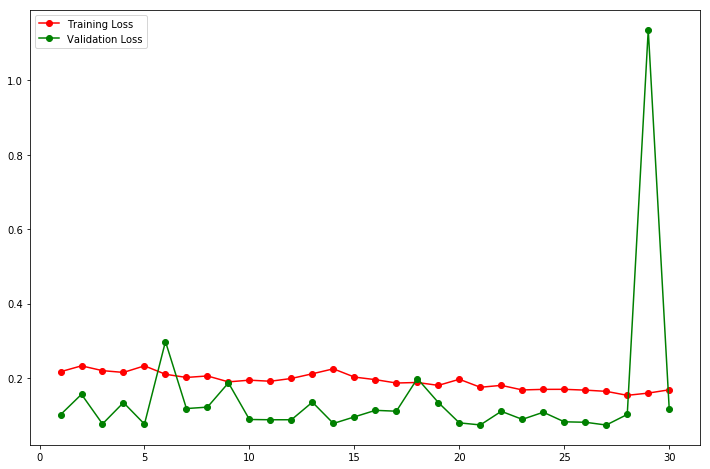

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
# Making the plot larger
plt.figure(figsize=(12, 8))

loss = history.history['loss']                          # Loss on the training data
val_loss = history.history['val_loss']                  # Loss on the validation data
epochs = range(1, 31)

plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label = 'Validation Loss')
plt.legend()